# Assignment 3

You only need to write one line of code for each question. When answering questions that ask you to identify or interpret something, the length of your response doesn’t matter. For example, if the answer is just ‘yes,’ ‘no,’ or a number, you can just give that answer without adding anything else.

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that **no outside searches are required by the assignment!**). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Clustering and Resampling

Let's set up our workspace and use the **Iris dataset** from `scikit-learn`. This dataset is a classic dataset in machine learning and statistics, widely used for clustering tasks. It consists of 150 samples of iris flowers, each belonging to one of three species: Iris setosa, Iris versicolor, and Iris virginica. Here are the key features and characteristics of the dataset:

##### Features:
1. **Sepal Length**: The length of the sepal in centimeters.
2. **Sepal Width**: The width of the sepal in centimeters.
3. **Petal Length**: The length of the petal in centimeters.
4. **Petal Width**: The width of the petal in centimeters.

##### Target Variable:
- **Species**: The species of the iris flower, which can take one of the following values:
  - 0: Iris setosa
  - 1: Iris versicolor
  - 2: Iris virginica

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


#### **Question 1:** 
#### Data inspection

#### Load the Iris dataset:

Use scikit-learn to load the Iris dataset and convert it into a Pandas DataFrame.
Display the first few rows of the dataset. How many observations (rows) and features (columns) does the dataset contain?

In [3]:
# Load Iris dataset
from sklearn.datasets import load_iris
iris_data = load_iris()
import pandas as pd
from sklearn.datasets import load_iris

# Convert to DataFrame
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

# Bind species target to DataFrame
iris_df['species'] = iris_data.target

# Display DataFrame
iris_df

# Display first few rows of DataFrame
iris_df.head(), iris_df.shape

(   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
 0                5.1               3.5                1.4               0.2   
 1                4.9               3.0                1.4               0.2   
 2                4.7               3.2                1.3               0.2   
 3                4.6               3.1                1.5               0.2   
 4                5.0               3.6                1.4               0.2   
 
    species  
 0        0  
 1        0  
 2        0  
 3        0  
 4        0  ,
 (150, 5))

The dataset contains 150 observations (rows) and 5 features (columns) that includes 4 features (sepal length, sepal width, petal length, petal width) and the species target variable

#### **Question 2:** 
#### Data-visualization

Create plots to visualize the relationships between the features (sepal length, sepal width, petal length, petal width).


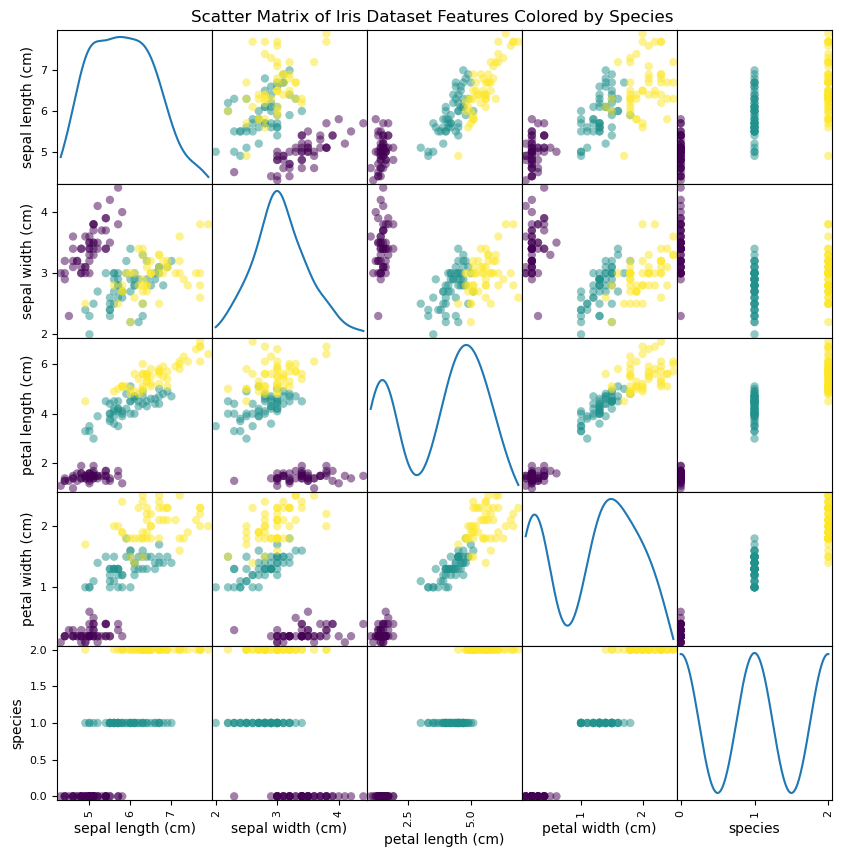

In [4]:
# Import scatter matrix from pandas.plotting
from pandas.plotting import scatter_matrix

# Create scatter matrix plot to visualize relationships between the features
scatter_matrix(iris_df, figsize=(10, 10), diagonal='kde', c=iris_df['species'], cmap='viridis', marker='o')

# Displaying the plot
plt.suptitle('Scatter Matrix of Iris Dataset Features Colored by Species', y=0.9)
plt.show()


#### **Question 3:** 
#### Data cleaning

In [5]:
# Initialize StandardScaler
scaler = StandardScaler()

# Scale features  
scaled_features = scaler.fit_transform(iris_df.iloc[:, :-1])

# Create a new DataFrame with scaled features
scaled_iris_df = pd.DataFrame(scaled_features, columns=iris_data.feature_names)

# Add species column to scaled DataFrame
scaled_iris_df['species'] = iris_df['species'].values

# Display first few rows of DataFrame
print(scaled_iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0          -0.900681          1.019004          -1.340227         -1.315444   
1          -1.143017         -0.131979          -1.340227         -1.315444   
2          -1.385353          0.328414          -1.397064         -1.315444   
3          -1.506521          0.098217          -1.283389         -1.315444   
4          -1.021849          1.249201          -1.340227         -1.315444   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


Why is it important to standardize the features of a dataset before applying clustering algorithms like K-Means? Discuss the implications of using unstandardized data in your analysis.

Importance of Standardizing Features Before Applying Clustering Algorithms

There are several important reasons to standardize features of a dataset prior to applying clustering algorithms that includes the following: 
1. Clustering algorithms (including K-means) utilize features with different scales (e.g. features like bill length (32.1 to 59.6 mm) and flipper length (172 to 231 mm) in the penguin dataset covered in class). The algorithm may place more importance on features with larger numerical values, which would skew the clusters to the features with larger scale.

2. Standardization helps to ensure that each feature contributes equally to the distance computation. Without standardization, features with larger scales would dominate the distance in comparison to data with smaller scales.

3. Standardization enables easier interpretability and comparison of the clustering results. Without standardization, comparing clusters based on feature values becomes difficult because the features are on different scales.

Implications of Unstandardized Data

If data is unstandardized first, several issues would likely occur.
1. Points might be incorrectly assigned to a cluster because the algorithm might be overly sensitive to one feature while diminishing the relative distance of others.

2. The algorithm may identify an incorrect number of clusters than expected due to the skewed influence of certain features.

3. Unstandardized data can result in biased cluster centroids. The clustering algorithm might incorrectly group data points, which could result in  suboptimal or misleading clusters. For instance, features with higher variance can cause the algorithm to distort the cluster shapes. This could also lead to a distortion of the clusters.


#### **Question 4:** 
#### K-means clustering 
Apply the K-Means clustering algorithm to the Iris dataset.
Choose the number of clusters (K=3, since there are three species) and fit the model.
Assign cluster labels to the original data and add them as a new column in the DataFrame.

In [6]:
# Import modules
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Set random seed for reproducibility
random_seed = 42

# Standardizing features
scaler = StandardScaler()
iris_standardized = scaler.fit_transform(iris_df.drop("species", axis=1))

# Apply K-Means clustering, K=3 and random seed=42
kmeans = KMeans(n_clusters=3, random_state=random_seed)
iris_df['cluster'] = kmeans.fit_predict(iris_standardized)

# Create cross-tabulation to compare cluster labels and true species labels
cross_tabulation = pd.crosstab(iris_df['species'], iris_df['cluster'], rownames=['True Species'], colnames=['Cluster'])

# Display cross-tabulation
cross_tabulation

c:\Users\Q\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster,0,1,2
True Species,,,
0,0,33,17
1,46,0,4
2,50,0,0


Discuss the results of the K-Means clustering. How well did the clusters match the true species?

K-Means successfully identifed Iris setosa species into a distinct cluster. However, the data seems to show that Iris versicolor and Iris virginica are more difficult to distinguish based on the observations of these species based on an inconsistent split in 2 of the 3 clusters (in the latest code run, Clusters 0 and 1 showed this split). This overlap suggests that K-Means does not clearly distinguish these two species due to the similarity in their feature distributions.

The results of K-Means clustering match the true species labels well for Iris setosa but not for Iris versicolor and Iris virginica because there is significant overlap between these two species in two of the three clusters.

#### **Question 5:** 
#### Bootstrapping 

 Implement bootstrapping on the mean of one of the sepal or petal measurement variables (e.g., Sepal Length, Petal Width) to assess the stability of the mean estimate. Generate 1000 bootstrap samples, calculate the mean for each sample, and compute a 95% confidence interval to evaluate the variability in the estimate.

In [7]:
# Reimport libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

# Reload Iris dataset
iris_data = load_iris()

# Create DataFrame from dataset
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

# Rename columns  
iris_df.columns = [col.replace(" (cm)", "").replace(" ", "_") for col in iris_df.columns]

# Add species target variable to DataFrame
iris_df['species'] = iris_data.target

# Display first few rows and column names of df
iris_df.head(), iris_df.columns

# Choose 'sepal_length' for bootstrapping
sepal_length = iris_df['sepal_length']

# Set random seed for reproducibility
np.random.seed(42)

# Number of bootstrap samples
n_bootstrap_samples = 1000

# Create array to store the mean of each bootstrap sample
bootstrap_means = np.empty(n_bootstrap_samples)

# Generate bootstrap samples and calculate mean of each sample
for i in range(n_bootstrap_samples):
    bootstrap_sample = np.random.choice(sepal_length, size=len(sepal_length), replace=True)
    bootstrap_means[i] = np.mean(bootstrap_sample)

# Calculate 95% confidence interval for bootstrap means
confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])

# Calculate mean of original sepal length
original_mean = np.mean(sepal_length)

# Output original mean and confidence interval
original_mean, confidence_interval

# Original mean sepal length is 5.84cm and CI is 5.71cm and 5.97cm

(5.843333333333334, array([5.71063333, 5.97268333]))

Reflect on the variability observed in the bootstrapped means and discuss whether the mean of the selected variable appears to be a stable and reliable estimate based on the confidence interval and the spread of the bootstrapped means.

The bootstrapping results indicate that the mean of sepal_length is a stable and reliable estimate. The mean of 5.84 cm and 95% confidence interval results (range from 5.71 cm to 5.97 cm) is relatively narrow, suggesting low variability in the mean across different samples. This tight spread around the original mean of 5.84 cm indicates that the mean value does not fluctuate significantly when resampling; therefore, the sample mean is appropriate, seems to be a rational result, and not overly influenced by outliers or specific sample variations. Given the consistent distribution of the bootstrapped means, I can conclude that the sepal_length mean is a dependable estimate of the true population mean.

# Criteria


| **Criteria**                                           | **Complete**                                      | **Incomplete**                                    |
|--------------------------------------------------------|---------------------------------------------------|--------------------------------------------------|
| **Data Inspection**                                    | Data is thoroughly inspected for the number of variables, observations, and data types, and relevant insights are noted. | Data inspection is missing or lacks detail.         |
| **Data Visualization**                                 | Visualizations (e.g., scatter plots) are well-constructed and correctly interpreted to explore relationships between features and species. | Visualizations are poorly constructed or not correctly interpreted. |
| **Clustering Implementation**                           | K-Means clustering is correctly implemented, and cluster labels are appropriately assigned to the dataset.            | K-Means clustering is missing or incorrectly implemented. |
| **Bootstrapping Process**                              | Bootstrapping is correctly performed, and results are used to assess variable mean stability. | Bootstrapping is missing or incorrectly performed. |

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-4-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
